# 4. Penalty Methods
For this training course we'll be using the optimization routines in SciPy.

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

We also need to define a callback function so that we can plot the optimization steps.

In [2]:
def callback(x):
    global xprev
    plt.plot([xprev[0],x[0]],[xprev[1],x[1]],'b.-')
    xprev = x

## 4.1 Quadratic Penalty Method

Recall that the quadratic penalty function, for a single equality constraint $c$, is given by

$
\begin{align}
\Phi_{\mu}(x) = f(x) + \frac{1}{2\mu} \left(c(x)\right)^2
\end{align}
$

where $\mu >0$ is a penalty parameter. The gradient for the quadratic penalty is

$
\begin{align}
\nabla \Phi_{\mu}(x) = \nabla f(x) + \frac{1}{\mu}c(x)\nabla c(x)
\end{align}
$

and the Hessian is given by

$
\begin{align}
\nabla^2 \Phi_{\mu}(x) = \nabla^2 f(x) + \frac{1}{\mu}c(x)\nabla^2 c(x)  + \frac{1}{\mu}\nabla c(x)\nabla c(x)^T
\end{align}
$

#### Coding Task:

For different fixed values of $\mu$, apply your favourite SciPy optimization routine to minimize $\Phi_{\mu}(x)$ for the following objectives:

1. $f(x) = \frac{1}{2}(ax_1^2 + x_2^2) \qquad\qquad\qquad$ with $\; c(x) = x_1 + x_2^2 - 1$ 

2. $f(x) = (a - x_1)^2 + b(x_2 - x_1^2)^2 \qquad$ with $\; c(x) = x_1 + x_2^2 - 1$ 

starting at $(x_1,x_2) = (1,1)$ for suitable choices of parameters $a,b$.

     fun: 0.39780167284494916
     jac: array([6.47338781, 6.94096585])
 message: 'Optimization terminated successfully.'
    nfev: 4
    nhev: 0
     nit: 3
    njev: 7
  status: 0
 success: True
       x: array([0.71864146, 0.52734093])


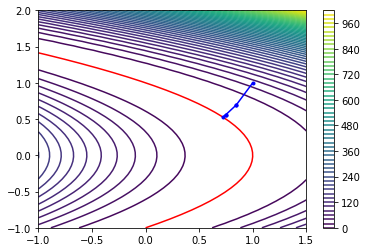

In [3]:
# Parameters
a = 1
mu = 0.01

# Initial guess
x0 = np.array([1,1])

# Objective function, gradient and Hessian
obj = lambda x: 0.5*(a*x[0]**2+x[1]**2)  
gobj = lambda x: np.array([a*x[0],x[1]])  
hobj = lambda x: np.array([[a,0],[0,1]])

# Constraint function, gradient and Hessian
con = lambda x: x[0]+x[1]**2-1
gcon = lambda x: np.array([1,2*x[1]])
hcon = lambda x: np.array([[0,0],[0,2]])

# Penalty function, gradient and Hessian
fun = lambda x: obj(x) + 0.5*(1/mu)*(con(x))**2
jac = lambda x: gobj(x) + (1/mu)*con(x)*gcon(x)
hess = lambda x: hobj(x) + (1/mu)*con(x)*hcon(x) + (1/mu)*gcon(x).dot(gcon(x).T)

# Plot function contours
plt.figure()
X = np.linspace(-1,1.5)
Y = np.linspace(-a,a+1)
Z = np.meshgrid(X,Y)
plt.contour(X,Y,fun(Z),50)
plt.colorbar()

# Plot constraint
plt.contour(X,Y,con(Z),[0],colors='r')

# Call SciPy's Newton-CG
xprev = x0 # for plotting
res = opt.minimize(fun, x0, method='Newton-CG', jac=jac, tol=1e-1, callback=callback)

# Print results and show plot
print(res)
plt.show()

     fun: 0.18239998089638693
     jac: array([-4.04683586, 16.99693692])
 message: 'Optimization terminated successfully.'
    nfev: 4
    nhev: 0
     nit: 3
    njev: 7
  status: 0
 success: True
       x: array([0.74747194, 0.54537912])


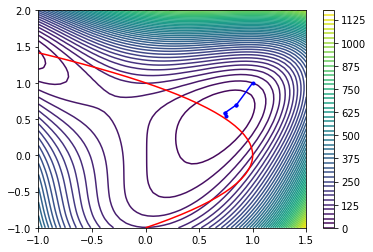

In [4]:
# Parameters
a = 1
b = 100
mu = 0.01

# Initial guess
x0 = np.array([1,1])

# Objective function, gradient and Hessian
obj = lambda x: (a-x[0])**2 + b*(x[1]-x[0]**2)**2
gobj = lambda x: np.array([-2*(a-x[0])-2*x[0]*2*b*(x[1]-x[0]**2),2*b*(x[1]-x[0]**2)])
hobj = lambda x: np.array([[2-4*b*x[1]+12*b*x[0]**2,-4*b*x[0]],[-4*b*x[0],2*b]])

# Constraint function, gradient and Hessian
con = lambda x: x[0]+x[1]**2-1
gcon = lambda x: np.array([1,2*x[1]])
hcon = lambda x: np.array([[0,0],[0,2]])

# Penalty function, gradient and Hessian
fun = lambda x: obj(x) + 0.5*(1/mu)*(con(x))**2
jac = lambda x: gobj(x) + (1/mu)*con(x)*gcon(x)
hess = lambda x: hobj(x) + (1/mu)*con(x)*hcon(x) + (1/mu)*gcon(x).dot(gcon(x).T)

# Plot function contours
plt.figure()
X = np.linspace(-1,1.5)
Y = np.linspace(-a,a+1)
Z = np.meshgrid(X,Y)
plt.contour(X,Y,fun(Z),50)
plt.colorbar()

# Plot constraint
plt.contour(X,Y,con(Z),[0],colors='r')

# Call SciPy's Newton-CG
xprev = x0 # for plotting
res = opt.minimize(fun, x0, method='Newton-CG', jac=jac, tol=1e-1, callback=callback)

# Print results and show plot
print(res)
plt.show()

## 4.2 Augmented Lagrangian Method

Recall that the augmented Lagrangian function, for a single equality constraint $c$, is given by

$
\begin{align}
\Psi_{u,\mu}(x) = f(x) - uc(x) + \frac{1}{2\mu} \left(c(x)\right)^2
\end{align}
$

where $u,\mu >0$ are auxiliary parameters. The gradient for the augmented Lagrangian is

$
\begin{align}
\nabla \Psi_{u,\mu}(x) = \nabla f(x) - u\nabla c(x) + \frac{1}{\mu}c(x)\nabla c(x)
\end{align}
$

and the Hessian is given by

$
\begin{align}
\nabla^2 \Psi_{u,\mu}(x) = \nabla^2 f(x) -u\nabla^2 c(x) + \frac{1}{\mu}c(x)\nabla^2 c(x)  + \frac{1}{\mu}\nabla c(x)\nabla c(x)^T
\end{align}
$

#### Coding Task:

For different fixed values of $u,\mu$, apply your favourite SciPy optimization routine to minimize $\Psi_{u,\mu}(x)$ for the following objectives:

1. $f(x) = \frac{1}{2}(ax_1^2 + x_2^2) \qquad\qquad\qquad$ with $\; c(x) = x_1 + x_2^2 - 1$ 

2. $f(x) = (a - x_1)^2 + b(x_2 - x_1^2)^2 \qquad$ with $\; c(x) = x_1 + x_2^2 - 1$ 

starting at $(x_1,x_2) = (1,1)$ for suitable choices of parameters $a,b$.

     fun: 0.3750014484872093
     jac: array([0.01993814, 0.04104253])
 message: 'Optimization terminated successfully.'
    nfev: 5
    nhev: 0
     nit: 4
    njev: 13
  status: 0
 success: True
       x: array([0.49910288, 0.70876198])


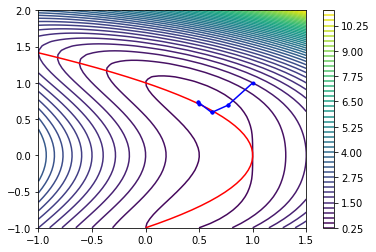

In [5]:
# Parameters
a = 1
u = 0.5
mu = 1

# Initial guess
x0 = np.array([1,1])

# Objective function, gradient and Hessian
obj = lambda x: 0.5*(a*x[0]**2+x[1]**2)  
gobj = lambda x: np.array([a*x[0],x[1]])  
hobj = lambda x: np.array([[a,0],[0,1]])

# Constraint function, gradient and Hessian
con = lambda x: x[0]+x[1]**2-1
gcon = lambda x: np.array([1,2*x[1]])
hcon = lambda x: np.array([[0,0],[0,2]])

# Penalty function, gradient and Hessian
fun = lambda x: obj(x) - u*con(x) + 0.5*(1/mu)*(con(x))**2
jac = lambda x: gobj(x) - u*gcon(x) + (1/mu)*con(x)*gcon(x)
hess = lambda x: hobj(x) - u*hcon(x) + (1/mu)*con(x)*hcon(x) + (1/mu)*gcon(x).dot(gcon(x).T)

# Plot function contours
plt.figure()
X = np.linspace(-1,1.5)
Y = np.linspace(-a,a+1)
Z = np.meshgrid(X,Y)
plt.contour(X,Y,fun(Z),50)
plt.colorbar()

# Plot constraint
plt.contour(X,Y,con(Z),[0],colors='r')

# Call SciPy's Newton-CG
xprev = x0 # for plotting
res = opt.minimize(fun, x0, method='Newton-CG', jac=jac, tol=1e-1, callback=callback)

# Print results and show plot
print(res)
plt.show()

     fun: -0.11057903094430657
     jac: array([ 2.35316041, -1.09476021])
 message: 'Optimization terminated successfully.'
    nfev: 3
    nhev: 0
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([0.91667042, 0.83995855])


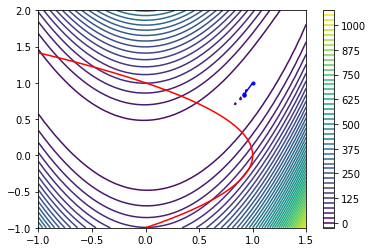

In [6]:
# Parameters
a = 1
b = 100
u = 0.5
mu = 1

# Initial guess
x0 = np.array([1,1])

# Objective function, gradient and Hessian
obj = lambda x: (a-x[0])**2 + b*(x[1]-x[0]**2)**2
gobj = lambda x: np.array([-2*(a-x[0])-2*x[0]*2*b*(x[1]-x[0]**2),2*b*(x[1]-x[0]**2)])
hobj = lambda x: np.array([[2-4*b*x[1]+12*b*x[0]**2,-4*b*x[0]],[-4*b*x[0],2*b]])

# Constraint function, gradient and Hessian
con = lambda x: x[0]+x[1]**2-1
gcon = lambda x: np.array([1,2*x[1]])
hcon = lambda x: np.array([[0,0],[0,2]])

# Penalty function, gradient and Hessian
fun = lambda x: obj(x) - u*con(x) + 0.5*(1/mu)*(con(x))**2
jac = lambda x: gobj(x) - u*gcon(x) + (1/mu)*con(x)*gcon(x)
hess = lambda x: hobj(x) - u*hcon(x) + (1/mu)*con(x)*hcon(x) + (1/mu)*gcon(x).dot(gcon(x).T)

# Plot function contours
plt.figure()
X = np.linspace(-1,1.5)
Y = np.linspace(-a,a+1)
Z = np.meshgrid(X,Y)
plt.contour(X,Y,fun(Z),50)
plt.colorbar()

# Plot constraint
plt.contour(X,Y,con(Z),[0],colors='r')

# Call SciPy's Newton-CG
xprev = x0 # for plotting
res = opt.minimize(fun, x0, method='Newton-CG', jac=jac, tol=1e-1, callback=callback)

# Print results and show plot
print(res)
plt.show()